# **Tarea 02.- Cambios de variable para linealizar datos**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="Imagenes/imta_logo.png" style="height: 5em; vertical-align: middle;">
<img src="Imagenes/Mexico.jpg" style="height: 5em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Docente: Dr. Gabriel Ruiz Martinez** <br>

[![Open In Colab](Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Tratamiento_Datos/blob/master/Clase_02.ipynb)

---

#### **Basado en los apuntes de Gabriel Ruiz Martinez**

Este notebook contiene apuntes sobre el método de mínimos cuadrados y cómo linealizar diferentes tipos de funciones para realizar ajustes de datos. Se incluyen implementaciones de las funciones de transformación presentes en la Tabla 1.

#### **1. Regresión en mínimos cuadrados**

El método de mínimos cuadrados se utiliza cuando necesitamos encontrar una curva o función matemática que ajuste de la mejor manera un conjunto de datos. Este método se fundamenta en minimizar la suma de los cuadrados de las diferencias (también llamados "errores" o "residuos") entre los valores observados y calculados por la función que ajusta nuestros datos.

##### **1.1. Determinación de la recta de regresión**

Teniendo un conjunto de pares de datos, $(x_1,y_1),(x_2,y_2),...,(x_N,y_N)$, deseamos encontrar una función que se aproxime lo más posible a nuestros puntos. Si suponemos que queremos ajustar una línea recta:

$$y = f(x) = Ax + B$$

Al aplicar el método de mínimos cuadrados debemos encontrar los coeficientes $A$ (la pendiente) y $B$ (la intercepción con el eje $y$), que minimicen la suma de los cuadrados de los residuales:

$$S = \sum_{i=1}^{N} [y_i - (Ax_i + B)]^2$$

La solución del sistema se obtiene mediante las ecuaciones normales de Gauss:

$$A = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - (\sum x_i)^2}$$

$$B = \frac{\sum x_i^2 \sum y_i - \sum x_i \sum x_i y_i}{N\sum x_i^2 - (\sum x_i)^2}$$

Donde: $N$ es el número de pares de datos, $x$ es la variable independiente de los datos, $y$ es la variable dependiente del conjunto de datos a analizar.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from IPython.display import display, Markdown, Math

In [9]:
def regresion_lineal(x, y):
    """Calcula los parámetros A y B de la recta de regresión y = Ax + B utilizando mínimos cuadrados.
    
    Args:
        x: Array con valores de la variable independiente
        y: Array con valores de la variable dependiente
        
    Returns:
        A: Pendiente de la recta
        B: Ordenada al origen
    """
    N = len(x)
    
    # Cálculo de sumas necesarias
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)
    
    # Cálculo de A y B usando las ecuaciones normales de Gauss
    denominador = N * sum_x2 - sum_x**2
    
    if denominador == 0:
        raise ValueError("El denominador es cero, no se puede calcular la regresión.")
    
    A = (N * sum_xy - sum_x * sum_y) / denominador
    B = (sum_x2 * sum_y - sum_x * sum_xy) / denominador
    
    return A, B

In [10]:
# Función para calcular el coeficiente de determinación (R²)
def calcular_r2(y_real, y_pred):
    """Calcula el coeficiente de determinación R²"""
    y_media = np.mean(y_real)
    ss_total = np.sum((y_real - y_media) ** 2)
    ss_residual = np.sum((y_real - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def calcular_error(y_real, y_pred):
    """Calcula el error cuadrático medio"""
    return np.mean((y_real - y_pred)**2)

#### **1.2. Cambios de variable que linealizan los datos**

Frecuentemente, linealizar los datos es una técnica que se usa para ajustar curvas como $y = Ce^{Ax}$, $y = Aln(x) + B$, etc. a un conjunto de datos. Según el tipo de curva, se realiza un cambio de variable para que las nuevas variables se relacionen linealmente.

A continuación implementamos funciones para cada uno de los cambios de variable presentados en la Tabla 1 (Mathews and Fink, 2000):

###### **Tabla 1: Cambios de variable para linealizar los datos**

| Función $y = f(x)$ | Linealización, $Y = Ax + B$ | Cambios |
|-------------------|---------------------------|----------|
| 1) $y = \frac{A}{x} + B$ | $y = A\frac{1}{x} + B$ | $X = \frac{1}{x}, Y = y$ |
| 2) $y = \frac{D}{x + C}$ | $y = \frac{-1}{C}(xy) + \frac{D}{C}$ | $X = xy, Y = y, C = \frac{-1}{A}, D = \frac{-B}{A}$ |
| 3) $y = \frac{1}{Ax + B}$ | $\frac{1}{y} = Ax + B$ | $X = x, Y = \frac{1}{y}$ |
| 4) $y = \frac{x}{Ax + B}$ | $\frac{1}{y} = A\frac{1}{x} + B$ | $X = \frac{1}{x}, Y = \frac{1}{y}$ |
| 5) $y = Aln(x) + B$ | $y = Aln(x) + B$ | $X = ln(x), Y = y$ |
| 6) $y = Ce^{Ax}$ | $ln(y) = Ax + ln(C)$ | $X = x, Y = ln(y), C = e^B$ |
| 7) $y = Cx^A$ | $ln(y) = Aln(x) + ln(C)$ | $X = ln(x), Y = ln(y), C = e^B$ |
| 8) $y = \frac{1}{(Ax + B)^2}$ | $y^{-1/2} = Ax + B$ | $X = x, Y = y^{-1/2}$ |
| 9) $y = Cxe^{-Dx}$ | $ln(\frac{y}{x}) = -Dx + ln(C)$ | $X = x, Y = ln(\frac{y}{x}), C = e^B, D = -A$ |

#### **2. Implementación de funciones para cada transformación**
A continuación implementaremos las funciones para cada uno de los 9 casos mostrados en la tabla. Para cada función incluiremos:
1. La transformación de variables (X, Y)
2. La transformación inversa para obtener los parámetros originales
3. Una función para graficar los datos originales y el ajuste

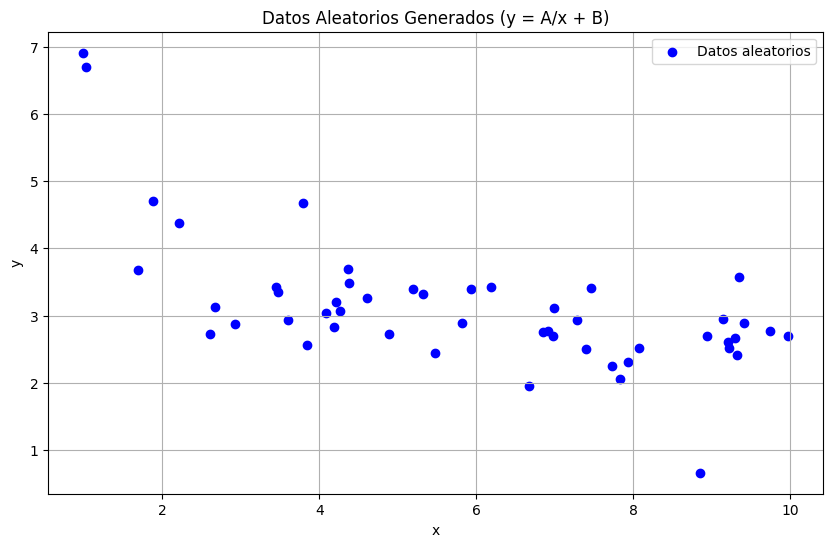

In [11]:
# Establecer una semilla para reproducibilidad
np.random.seed(50)

# Generar valores aleatorios para x (variable independiente)
n_puntos = 50  # Número de puntos de datos
x = np.random.uniform(0.5, 10, n_puntos)  # Valores positivos entre 0.5 y 10

# Generar valores aleatorios para y (variable dependiente)
# Usaremos el modelo y = A/x + B con algo de ruido
A_real = 5.0  # Parámetro A real
B_real = 2.0  # Parámetro B real
ruido = np.random.normal(0, 0.5, n_puntos)  # Ruido aleatorio más pequeño
y = A_real/x + B_real + ruido

# Visualizar los datos aleatorios
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos aleatorios')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Aleatorios Generados (y = A/x + B)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Cargar los datos
datos = pd.read_csv('./Datos/exptermi.csv', header=None)
datos = datos.rename(columns={0: 'nrm', 1: 'v'})

# Extraer variables x e y
x = datos['v'].values
y = datos['nrm'].values

#### **Caso 1:** Recírpoca con término constante
$$y = \frac{A}{x} + B$$

[0.15396459 0.15003751 0.14803849 0.15232292 0.15163002 0.1537279
 0.1509434  0.15349194 0.1507159  0.1509434  0.14892033 0.1525553
 0.1507159  0.1509434  0.15209125 0.15637217 0.154202   0.14892033
 0.15026296 0.14760148 0.1525553  0.15026296 0.15140045 0.14958863]
---
[0.14760148 0.14803849 0.14892033 0.14892033 0.14958863 0.15003751
 0.15026296 0.15026296 0.1507159  0.1507159  0.1509434  0.1509434
 0.1509434  0.15140045 0.15163002 0.15209125 0.15232292 0.1525553
 0.1525553  0.15349194 0.1537279  0.15396459 0.154202   0.15637217]


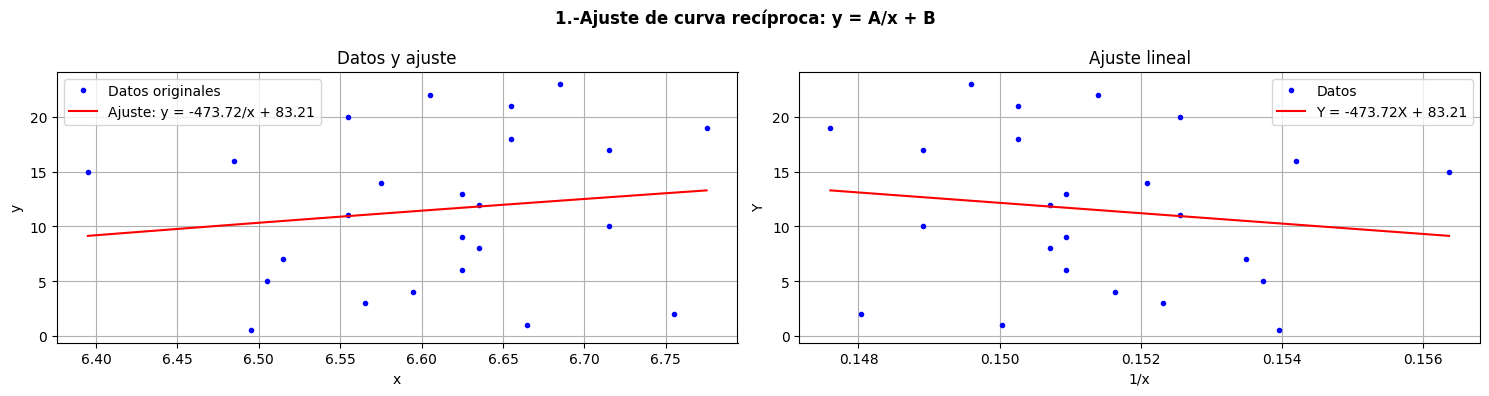

Resultados del ajuste:
A = -473.7191
B = 83.2144
R² = 0.0198
Error cuadrático medio = 4.6510e+01
Ecuación ajustada: y = -473.7191/x + 83.2144


In [13]:
# Transformación de variables
X = 1/x
Y = y

# Ajuste lineal usando la función proporcionada
A, B = regresion_lineal(X, Y)

# Predicción con el modelo ajustado
y_ajustado = A/x + B

# Cálculo de R² y error
r2 = calcular_r2(y, y_ajustado)
error = calcular_error(y, y_ajustado)

# Visualización del ajuste
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
fig.suptitle('1.-Ajuste de curva recíproca: y = A/x + B', fontweight='bold')

# Gráfica 1: Datos originales y ajuste
ax1.plot(x, y, 'b.', label='Datos originales')
x_curve = np.linspace(min(x), max(x), 100)
y_curve = A/x_curve + B
ax1.plot(x_curve, y_curve, 'r-', label=f'Ajuste: y = {A:.2f}/x + {B:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc='best')
ax1.grid(True)
ax1.set_title('Datos y ajuste')

# Gráfica 2: Ajuste lineal de datos transformados
print(X)
X_sort = np.sort(X)
print('---')
print(X_sort)
Y_line = A * X_sort + B
ax2.plot(X, Y, 'b.', label='Datos')
ax2.plot(X_sort, Y_line, 'r-', label=f'Y = {A:.2f}X + {B:.2f}')
ax2.set_xlabel('1/x')
ax2.set_ylabel('Y')
ax2.legend(loc='best')
ax2.grid(True)
ax2.set_title('Ajuste lineal')

plt.tight_layout()
plt.show()

print(f"Resultados del ajuste:")
print(f"A = {A:.4f}")
print(f"B = {B:.4f}")
print(f"R² = {r2:.4f}")
print(f"Error cuadrático medio = {error:.4e}")
print(f"Ecuación ajustada: y = {A:.4f}/x + {B:.4f}")

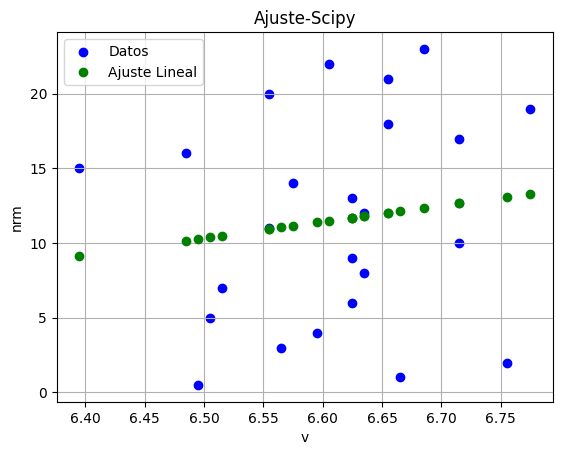

--------
Ecuacion de ajuste:
Resultados del ajuste:
A = -473.7191
B = 83.2144
Error cuadrático medio = 1.9752e-02
Ecuación ajustada: y = -473.7191/x + 83.2144
y = -473.7191 * x  + (83.2144) con R^2 = 0.0198


In [14]:
# Método ajuste con Scipy
# Definición del modelo lineal
def model01(x, m, b):
    return (m/x) + b

popt, pcov = curve_fit(model01, x, y)

y_pred = model01(x, *popt)

# Calculando el coeficiente de determinación R^2
coef_deter = r2_score(y, y_pred)

# Graficando los datos y la recta de ajuste
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_pred, 'go', label='Ajuste Lineal')
plt.xlabel('v')
plt.ylabel('nrm')
plt.title('Ajuste-Scipy')
plt.legend()
plt.grid()
plt.show()
print("--------")
print("Ecuacion de ajuste:")
# Imprimiendo la ecuacion de ajuste
print(f"Resultados del ajuste:")
print(f"A = {popt[0]:.4f}")
print(f"B = {popt[1]:.4f}")
#print(f"R² = {coef_deter:.4f}")
print(f"Error cuadrático medio = {coef_deter:.4e}")
print(f"Ecuación ajustada: y = {popt[0]:.4f}/x + {popt[1]:.4f}")

print(f"y = {popt[0]:.4f} * x  + ({popt[1]:.4f}) con R^2 = {coef_deter:.4f}")

Función recíproca con término constante: y = A/x + B
Función racional (fracción): y = D/(x + C)
Función recíproca: y = 1/(Ax + B)
Función racional recíproca: y = x/(Ax + B)
Función logarítmica: y = Aln(x) + B
Función exponencial: y = Ce^(Ax)
Función potencial: y = Cx^A
Función recíproca cuadrática: y = 1/(Ax + B)²
Función con decaimiento exponencial: y = Cxe^(-Dx)